In [1]:
%matplotlib 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from scipy.optimize import curve_fit


%matplotlib inline

Using matplotlib backend: MacOSX


# Integral data sorted by sample 

In [2]:
data = np.loadtxt('10uM_double.txt',
                  delimiter=';', usecols=(1,2,3,4,5,6))
data2 = np.loadtxt('high_conc_NMR.txt',
                  delimiter=';', usecols=(1,2,3,4,5,6))
data3 = np.loadtxt('double_rett.txt',
                  delimiter=';', usecols=(1,2,3,4,5))
data4 = np.loadtxt('PET_powder_all.txt',
                  delimiter=';', usecols=(1,2,3,4,5,6))
data5 = np.loadtxt('PET_Film_all.txt',
                  delimiter=';', usecols=(1,2,3,4,5,6))

In [3]:

# powder, low conc: 
wt_L = np.array([data4[0], data4[6], data4[12], data4[18], data4[24], data4[30], data4[36], data4[42], data4[48], data4[54]])
wt_aCD_L = np.array([data4[1], data4[7], data4[13], data4[19], data4[25], data4[31], data4[37], data4[43], data4[49], data4[55]])
T45P_L = np.array([data4[2], data4[8], data4[14], data4[20], data4[26], data4[32], data4[38], data4[44], data4[50], data4[56]])
T45P_aCD_L = np.array([data4[3], data4[9], data4[15], data4[21], data4[27], data4[33], data4[39], data4[45], data4[51], data4[57]])
L182A_L = np.array([data4[4], data4[10], data4[16], data4[22], data4[28], data4[34], data4[40], data4[46], data4[52], data4[58]])
L182A_aCD_L = np.array([data4[5], data4[11], data4[17], data4[23], data4[29], data4[35], data4[41], data4[47], data4[53], data4[59]])
T45P_L182A_L = np.array([data3[0], data3[4], data3[8], data3[12], data3[16], data3[20]])
T45P_L182A_aCD_L = np.array([data3[2], data3[6], data3[10], data3[14], data3[18], data3[22]])

# film, low conc: 
wt_F = np.array([data5[0], data5[6], data5[12], data5[18], data5[24], data5[30]])
wt_aCD_F = np.array([data5[1], data5[7], data5[13], data5[19], data5[25], data5[31]])
T45P_F = np.array([data5[2], data5[8], data5[14], data5[20], data5[26], data5[32]])
T45P_aCD_F = np.array([data5[3], data5[9], data5[15], data5[21], data5[27], data5[33]])
L182A_F = np.array([data5[4], data5[10], data5[16], data5[22], data5[28], data5[34]])
L182A_aCD_F = np.array([data5[5], data5[11], data5[17], data5[23], data5[29], data5[35]])
T45P_L182A_F= np.array([data3[1], data3[5], data3[9], data3[13], data3[17], data3[21]])
T45P_L182A_aCD_F = np.array([data3[3], data3[7], data3[11], data3[15], data3[19], data3[23]])

# powder, high conc
wt_H = np.array([data[0], data[3], data[6], data[9], data[12], data[15]])
wt_aCD_H = np.array([data[0],data2[0], data2[3], data2[6]])
T45P_H = np.array([data[0],data2[2], data2[5], data2[8]])
T45P_aCD_H = np.array([data[0],data2[1], data2[4], data2[7]])
T45P_L182A_H = np.array([data[1], data[4], data[7], data[10], data[13], data[16]])
T45P_L182A_aCD_H = np.array([data[2], data[5], data[8], data[11], data[14], data[17]])

## Calculate hours passed 

In [4]:

from datetime import datetime, timedelta

def calculate_hours(start_time_str, end_time_str, start_day=0, end_day=0):
    # Define the time format
    time_format = "%H.%M"  # Hour and minute format like 14.33
    
    # Calculate the start and end datetime objects
    # Use start_day as a base date (arbitrary date, for example, 2024-12-06)
    base_date = datetime(2024, 12, 17)
    
    # Construct the start and end datetime objects based on days and times
    start_datetime = base_date + timedelta(days=start_day)
    end_datetime = base_date + timedelta(days=end_day)
    
    # Add the time information to the start and end datetimes
    start_time = datetime.strptime(start_time_str, time_format).time()
    end_time = datetime.strptime(end_time_str, time_format).time()
    
    start_datetime = datetime.combine(start_datetime, start_time)
    end_datetime = datetime.combine(end_datetime, end_time)
    
    # Calculate the difference in hours
    time_diff = end_datetime - start_datetime
    hours_diff = time_diff.total_seconds() / 3600  # Convert seconds to hours
    
    return hours_diff


#Calculate hours for a specific experiment:

def make_hour_list(days, times):
    hours = []
    for i in range(len(days)):
        start_time_str = times[0]
        end_time_str = times[i]
        start_day = days[0]
        end_day = days[i]
        hours.append(calculate_hours(start_time_str, end_time_str, start_day, end_day))
        
    return hours


In [8]:
#Input time points for analyses, first is rx start time

# high conc: 
wt_days_H = [0, 0, 0, 1, 1, 2]
wt_times_H = ['10.15', '15.42', '21.33', '08.06', '18.46', '08.13']
wt_hours_H = make_hour_list(wt_days_H, wt_times_H)

wt_aCD_days_H = [0, 1, 1, 2]
wt_aCD_times_H = ['10.15','06.14', '16.52', '18.14']
wt_aCD_hours_H = make_hour_list(wt_aCD_days_H, wt_aCD_times_H)

T45P_days_H = [0, 1, 1, 2]
T45P_times_H = ['10.15','06.44', '17.10', '18.44']
T45P_hours_H = make_hour_list(T45P_days_H, T45P_times_H)

T45P_aCD_days_H = [0, 1, 1, 2]
T45P_aCD_times_H = ['10.15','06.32', '17.23', '18.32']
T45P_aCD_hours_H = make_hour_list(T45P_aCD_days_H, T45P_aCD_times_H)

T45P_L182A_days_H = [0, 0, 0, 1, 1, 2]
T45P_L182A_times_H = ['10.30', '16.00', '21.55', '08.24', '19.03', '08.31']
T45P_L182A_hours_H = make_hour_list(T45P_L182A_days_H, T45P_L182A_times_H)

T45P_L182A_aCD_days_H = [0, 0, 0, 1, 1, 2]
T45P_L182A_aCD_times_H = ['10.45', '16.13', '22.08', '08.37', '19.16', '08.44']
T45P_L182A_aCD_hours_H = make_hour_list(T45P_L182A_aCD_days_H, T45P_L182A_aCD_times_H)

# low conc

wt_days_L = [0, 0, 0, 1, 1, 1, 2, 3, 4, 5]
wt_times_L = ['14.33', '18.17', '22.25', '09.32', '14.14', '18.48', '12.36', '13.53', '11.58', '12.54']
wt_hours_L = make_hour_list(wt_days_L, wt_times_L)

wt_aCD_days_L = [0, 0, 0, 1, 1, 1, 2, 3, 4, 5]
wt_aCD_times_L = ['14.38', '18.34', '22.42', '09.50', '14.31', '19.06', '12.54', '14.11', '12.15', '13.11']
wt_aCD_hours_L = make_hour_list(wt_aCD_days_L, wt_aCD_times_L)

T45P_days_L = [0, 0, 0, 1, 1, 1, 2, 3, 4, 5]
T45P_times_L = ['14.43', '18.46', '22.55', '10.03', '14.45', '19.18', '13.06', '14.23', '12.27', '13.24']
T45P_hours_L = make_hour_list(T45P_days_L, T45P_times_L)

T45P_aCD_days_L = [0, 0, 0, 1, 1, 1, 2, 3, 4, 5]
T45P_aCD_times_L = ['14.48', '18.58', '23.07', '10.15', '14.57', '19.30', '13.19', '14.35', '12.39', '13.36']
T45P_aCD_hours_L = make_hour_list(T45P_aCD_days_L, T45P_aCD_times_L)

L182A_days_L = [0, 0, 0, 1, 1, 1, 2, 3, 4, 5]
L182A_times_L = ['14.52', '19.10', '23.19', '10.27', '15.09', '19.42', '13.30', '14.48', '12.51', '12.41']
L182A_hours_L = make_hour_list(L182A_days_L, L182A_times_L)

L182A_aCD_days_L = [0, 0, 0, 1, 1, 1, 2, 3, 4, 5]
L182A_aCD_times_L = ['14.56', '19.23', '23.33', '10.39', '15.23', '19.54', '13.42', '15.01', '11.46', '13.48']
L182A_aCD_hours_L = make_hour_list(L182A_aCD_days_L, L182A_aCD_times_L)

T45P_L182A_days_L = [0, 0, 1, 1, 2, 3]
T45P_L182A_times_L = ['13.08', '23.43', '10.55', '18.38', '10.15', '10.19']
T45P_L182A_hours_L = make_hour_list(T45P_L182A_days_L, T45P_L182A_times_L)

T45P_L182A_aCD_days_L = [0, 1, 1, 1, 2, 3]
T45P_L182A_aCD_times_L = ['13.40', '00.15', '11.26', '19.09', '10.46', '10.50']
T45P_L182A_aCD_hours_L = make_hour_list(T45P_L182A_aCD_days_L, T45P_L182A_aCD_times_L)

#film, low cons
wt_days_F = [0, 0, 1, 1, 2, 3]
wt_times_F = ['16.23', '21.57', '08.10', '17.29', '10.37', '10.25']
wt_hours_F = make_hour_list(wt_days_F, wt_times_F)

wt_aCD_days_F = [0, 0, 1, 1, 2,3]
wt_aCD_times_F = ['16.42', '22.15', '08.28', '17.46', '10.55', '10.43']
wt_aCD_hours_F = make_hour_list(wt_aCD_days_F, wt_aCD_times_F)

T45P_days_F = [0, 0, 1, 1, 2, 3]
T45P_times_F = ['16.56', '22.28', '08.41', '17.59', '11.07', '10.56']
T45P_hours_F = make_hour_list(T45P_days_F, T45P_times_F)

T45P_aCD_days_F = [0, 0, 1, 1, 2, 3]
T45P_aCD_times_F = ['17.10', '22.41', '08.53', '18.11', '11.20', '11.08']
T45P_aCD_hours_F = make_hour_list(T45P_aCD_days_F, T45P_aCD_times_F)

L182A_days_F = [0, 0, 1, 1, 2, 3]
L182A_times_F = ['17.24', '22.53', '09.05', '18.24', '11.32', '11.20']
L182A_hours_F = make_hour_list(L182A_days_F, L182A_times_F)

L182A_aCD_days_F = [0, 0, 1, 1, 2, 3]
L182A_aCD_times_F = ['17.37', '23.06', '09.17', '18.36', '11.44', '11.33']
L182A_aCD_hours_F = make_hour_list(L182A_aCD_days_F, L182A_aCD_times_F)

T45P_L182A_days_F = [0, 1, 1, 1, 2, 3]
T45P_L182A_times_F = ['13.27', '00.01', '11.14', '18.56', '10.33', '10.37']
T45P_L182A_hours_F = make_hour_list(T45P_L182A_days_F, T45P_L182A_times_F)

T45P_L182A_aCD_days_F = [0, 1, 1, 1, 2, 3]
T45P_L182A_aCD_times_F = ['13.52', '00.27', '11.39', '19.22', '10.59', '11.02']
T45P_L182A_aCD_hours_F = make_hour_list(T45P_L182A_aCD_days_F, T45P_L182A_aCD_times_F)

#column numbers
BHET = 0
MHET1 = 1
MHET2 = 2
TPA = 3
TSP = 4


# Make plot of product concentrations for one sample

In [19]:
#Make it easier to plot

def define_exp(exp):
    if exp == 'wt_H':
        sample_hours = wt_hours_H
        sample = wt_H
        title = 'wt-FsC_H'
    
    elif exp == 'wt_aCD_H':
        sample_hours = wt_aCD_hours_H
        sample = wt_aCD_H
        title = 'wt-FsC + cyclodextrin_H'
        
    elif exp == 'T45P_H':
        sample_hours = T45P_hours_H
        sample = T45P_H
        title = 'FsC-T45P'
    
    elif exp == 'T45P_aCD_H':
        sample_hours = T45P_aCD_hours_H
        sample = T45P_aCD_H
        title = 'FsC-T45P + cyclodextrin'
    
    elif exp == 'T45P_L182A_H':
        sample_hours = T45P_L182A_hours_H
        sample = T45P_L182A_H
        title = 'FsC-T45P_L182A_H'
    
    elif exp == 'T45P_L182A_aCD_H':
        sample_hours = T45P_L182A_aCD_hours_H
        sample = T45P_L182A_aCD_H
        title = 'FsC-T45P_L182A + cyclodextrin'
    
    elif exp == 'wt_L':
        sample_hours = wt_hours_L
        sample = wt_L
        title = 'wt-FsC_L'
    
    elif exp == 'wt_aCD_L':
        sample_hours = wt_aCD_hours_L
        sample = wt_aCD_L
        title = 'wt-FsC_L + cyclodextrin'
    
    elif exp == 'T45P_L182A_L':
        sample_hours = T45P_L182A_hours_L
        sample = T45P_L182A_L
        title = 'PET powder: FsC-T45P_L182A'
    
    elif exp == 'T45P_L182A_aCD_L':
        sample_hours = T45P_L182A_aCD_hours_L
        sample = T45P_L182A_aCD_L
        title = 'PET powder: FsC-T45P_L182A + a-CD'
        
    elif exp == 'L182A_L':
        sample_hours = L182A_hours_L
        sample = L182A_L
        title = 'FsC-L182A + cyclodextrin'
    
    elif exp == 'L182A_aCD_L':
        sample_hours = L182A_aCD_hours_L
        sample = L182A_aCD_L
        title = 'FsC-L182A + a-CD'
        
    if exp == 'wt_F':
        sample_hours = wt_hours_F
        sample = wt_F
        title = 'wt-FsC_F'
    
    elif exp == 'wt_aCD_F':
        sample_hours = wt_aCD_hours_F
        sample = wt_aCD_F
        title = 'wt-FsC_F + cyclodextrin'
    
    elif exp == 'T45P_F':
        sample_hours = T45P_hours_F
        sample = T45P_F
        title = 'FsC-T45P_F'
    
    elif exp == 'T45P_aCD_F':
        sample_hours = T45P_aCD_hours_F
        sample = T45P_aCD_F
        title = 'FsC-T45P_F + cyclodextrin'
    
    elif exp == 'L182A_F':
        sample_hours = L182A_hours_F
        sample = L182A_F
        title = 'FsC-L182A_F'
    
    elif exp == 'L182A_aCD_F':
        sample_hours = L182A_aCD_hours_F
        sample = L182A_aCD_F
        title = 'FsC-L182A_F + cyclodextrin'
        
    elif exp == 'T45P_L182A_F':
        sample_hours = T45P_L182A_hours_F
        sample = T45P_L182A_F
        title = 'PET film: FsC-T45P_L182A'
    
    elif exp == 'T45P_L182A_aCD_F':
        sample_hours = T45P_L182A_aCD_hours_F
        sample = T45P_L182A_aCD_F
        title = 'PET film: FsC-T45P_L182A + a-CD'
        

    return sample_hours, sample, title


sample_hours, sample, title = define_exp(exp)


Text(479.8823529411765, 0.5, 'Concentration ($\\mu$M)')

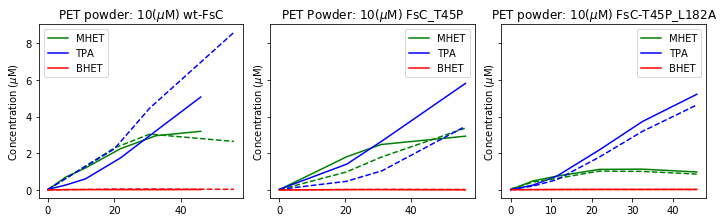

In [21]:
#make nice figurer of high conc
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 3))
fig.tight_layout()

#WT_H
sample_hours, sample, title = define_exp('wt_H')
column = MHET1
ax1.plot(sample_hours, sample[:,column]*400/(9*2), 'g-', label = 'MHET')
column = TPA
ax1.plot(sample_hours, sample[:,column]*400/(9*4), 'b-', label = 'TPA')
column = BHET
ax1.plot(sample_hours, sample[:,column]*400/(9*4), 'r-',  label = 'BHET')

sample_hours, sample, title = define_exp('wt_aCD_H')
column = MHET1
ax1.plot(sample_hours, sample[:,column]*400/(9*2), 'g--')
column = TPA
ax1.plot(sample_hours, sample[:,column]*400/(9*4),  'b--')
column = BHET
ax1.plot(sample_hours, sample[:,column]*400/(9*4), 'r--')

ax1.title.set_text('PET powder: 10($\mu$M) wt-FsC')
ax1.legend()
ax1.set_ylabel('Concentration ($\mu$M)')


#T45P_H
sample_hours, sample, title = define_exp('T45P_H')
column = MHET1
ax2.plot(sample_hours, sample[:,column]*400/(9*2), 'g-', label = 'MHET')
column = TPA
ax2.plot(sample_hours, sample[:,column]*400/(9*4), 'b-', label = 'TPA')
column = BHET
ax2.plot(sample_hours, sample[:,column]*400/(9*4), 'r-',  label = 'BHET')

sample_hours, sample, title = define_exp('T45P_aCD_H')
column = MHET1
ax2.plot(sample_hours, sample[:,column]*400/(9*2), 'g--')
column = TPA
ax2.plot(sample_hours, sample[:,column]*400/(9*4),  'b--')
column = BHET
ax2.plot(sample_hours, sample[:,column]*400/(9*4), 'r--')

ax2.title.set_text('PET Powder: 10($\mu$M) FsC_T45P')
ax2.legend()
ax2.set_ylabel('Concentration ($\mu$M)')

#T45P_L182A_H
sample_hours, sample, title = define_exp('T45P_L182A_H')
column = MHET1
ax3.plot(sample_hours, sample[:,column]*400/(9*2), 'g-', label = 'MHET')
column = TPA
ax3.plot(sample_hours, sample[:,column]*400/(9*4), 'b-', label = 'TPA')
column = BHET
ax3.plot(sample_hours, sample[:,column]*400/(9*4), 'r-',  label = 'BHET')

sample_hours, sample, title = define_exp('T45P_L182A_aCD_H')
column = MHET1
ax3.plot(sample_hours, sample[:,column]*400/(9*2), 'g--')
column = TPA
ax3.plot(sample_hours, sample[:,column]*400/(9*4),  'b--')
column = BHET
ax3.plot(sample_hours, sample[:,column]*400/(9*4), 'r--')

ax3.title.set_text('PET powder: 10($\mu$M) FsC-T45P_L182A')
ax3.legend()
ax3.set_ylabel('Concentration ($\mu$M)')





## Plot product ratios 

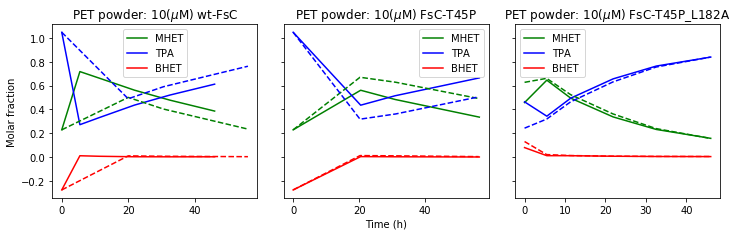

In [23]:
# for high conc: 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 3))
fig.tight_layout()

#WT_H
sample_hours, sample, title = define_exp('wt_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
column = MHET1
ax1.plot(sample_hours, sample[:,column]/(2*total_products), 'g-', label = 'MHET')
column = TPA
ax1.plot(sample_hours, sample[:,column]/(4*total_products), 'b-', label = 'TPA')
column = BHET
ax1.plot(sample_hours, sample[:,column]/(4*total_products), 'r-',  label = 'BHET')

sample_hours, sample, title = define_exp('wt_aCD_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
column = MHET1
ax1.plot(sample_hours, sample[:,column]/(2*total_products), 'g--')
column = TPA
ax1.plot(sample_hours, sample[:,column]/(4*total_products),  'b--')
column = BHET
ax1.plot(sample_hours, sample[:,column]/(4*total_products), 'r--')

ax1.title.set_text('PET powder: 10($\mu$M) wt-FsC')
ax1.legend()
ax1.set_ylabel('Molar fraction')

#T45P_H
sample_hours, sample, title = define_exp('T45P_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
column = MHET1
ax2.plot(sample_hours, sample[:,column]/(2*total_products), 'g-', label = 'MHET')
column = TPA
ax2.plot(sample_hours, sample[:,column]/(4*total_products), 'b-', label = 'TPA')
column = BHET
ax2.plot(sample_hours, sample[:,column]/(4*total_products), 'r-',  label = 'BHET')

sample_hours, sample, title = define_exp('T45P_aCD_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
column = MHET1
ax2.plot(sample_hours, sample[:,column]/(2*total_products), 'g--')
column = TPA
ax2.plot(sample_hours, sample[:,column]/(4*total_products),  'b--')
column = BHET
ax2.plot(sample_hours, sample[:,column]/(4*total_products), 'r--')

ax2.title.set_text('PET powder: 10($\mu$M) FsC-T45P')
ax2.set_xlabel('Time (h)')
ax2.legend()


#T45P_L182A_H
sample_hours, sample, title = define_exp('T45P_L182A_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
column = MHET1
ax3.plot(sample_hours, sample[:,column]/(2*total_products), 'g-', label = 'MHET')
column = TPA
ax3.plot(sample_hours, sample[:,column]/(4*total_products), 'b-', label = 'TPA')
column = BHET
ax3.plot(sample_hours, sample[:,column]/(4*total_products), 'r-',  label = 'BHET')

sample_hours, sample, title = define_exp('T45P_L182A_aCD_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
column = MHET1
ax3.plot(sample_hours, sample[:,column]/(2*total_products), 'g--')
column = TPA
ax3.plot(sample_hours, sample[:,column]/(4*total_products),  'b--')
column = BHET
ax3.plot(sample_hours, sample[:,column]/(4*total_products), 'r--')

ax3.title.set_text('PET powder: 10($\mu$M) FsC-T45P_L182A')
ax3.legend()

#plt.savefig('nmr_plot_ratios.png', bbox_inches='tight')


## Plot total yields

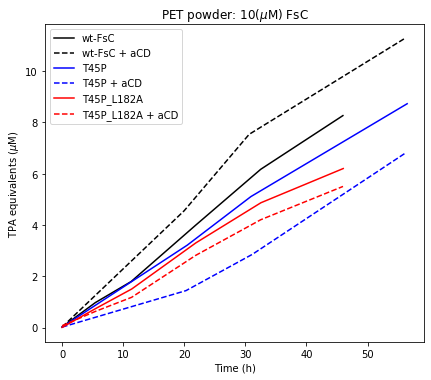

In [24]:
# For high conc:

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
fig.tight_layout()

#WT_H
sample_hours, sample, title = define_exp('wt_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'k-', label = 'wt-FsC')

sample_hours, sample, title = define_exp('wt_aCD_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'k--', label = 'wt-FsC + aCD')

#T45P_H
sample_hours, sample, title = define_exp('T45P_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'b-', label = 'T45P')

sample_hours, sample, title = define_exp('T45P_aCD_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'b--', label = 'T45P + aCD')


#T45P_L182A_H
sample_hours, sample, title = define_exp('T45P_L182A_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'r-', label = 'T45P_L182A')

sample_hours, sample, title = define_exp('T45P_L182A_aCD_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'r--', label = 'T45P_L182A + aCD')

ax.legend()
ax.set_ylabel('TPA equivalents ($\mu$M)')
ax.set_xlabel('Time (h)')
ax.title.set_text('PET powder: 10($\mu$M) FsC')

#plt.savefig('nmr_plot_yields.png', bbox_inches='tight')
#plt.show()

## Comparison of wt low conc and high and double mutant low conc and high

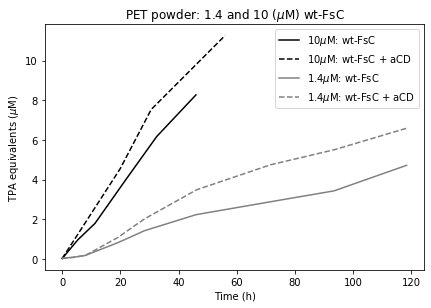

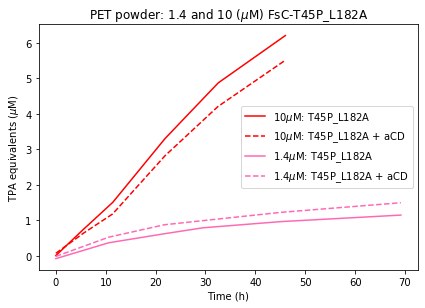

In [29]:

#plot total yields

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
fig.tight_layout()

#WT_H
sample_hours, sample, title = define_exp('wt_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'k-', label = '10$\mu$M: wt-FsC')

sample_hours, sample, title = define_exp('wt_aCD_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'k--', label = '10$\mu$M: wt-FsC + aCD')

#WT_low
sample_hours, sample, title = define_exp('wt_L')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, color='gray', linestyle='-', label='1.4$\mu$M: wt-FsC')

sample_hours, sample, title = define_exp('wt_aCD_L')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, color='gray', linestyle='--', label='1.4$\mu$M: wt-FsC + aCD')

ax.legend()
ax.set_ylabel('TPA equivalents ($\mu$M)')
ax.set_xlabel('Time (h)')
ax.title.set_text('PET powder: 1.4 and 10 ($\mu$M) wt-FsC')

#plot total yields

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
fig.tight_layout()



#double_H
sample_hours, sample, title = define_exp('T45P_L182A_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'r-', label = '10$\mu$M: T45P_L182A')

sample_hours, sample, title = define_exp('T45P_L182A_aCD_H')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, 'r--', label = '10$\mu$M: T45P_L182A + aCD')


#double_Low
sample_hours, sample, title = define_exp('T45P_L182A_L')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, color='hotpink', linestyle='-', label='1.4$\mu$M: T45P_L182A')

sample_hours, sample, title = define_exp('T45P_L182A_aCD_L')
total_products = sample[:, MHET1]/2 + sample[:, TPA]/4 + sample[:, BHET]/4
ax.plot(sample_hours, total_products*400/9, color='hotpink', linestyle='--', label='1.4$\mu$M: T45P_L182A + aCD')

ax.legend()
ax.set_ylabel('TPA equivalents ($\mu$M)')
ax.set_xlabel('Time (h)')
ax.title.set_text('PET powder: 1.4 and 10 ($\mu$M) FsC-T45P_L182A')